Nama: Dani Harmade

NIM: 12250310356

Tugas: Pertemuan 5

Kasus: DBS Group Holdings Ltd (D05.SI)

In [2]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk DBS Group Holdings Ltd
kode_saham = "D05.SI"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-04-20"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,D05.SI,D05.SI,D05.SI,D05.SI,D05.SI
Date,,,,,
2019-01-01,15.787603,15.787603,15.787603,15.787603,0
2019-01-02,15.654317,15.907559,15.501039,15.834252,3011374
2019-01-03,15.387748,15.601003,15.347762,15.507703,5735400
2019-01-04,15.521030,15.521030,15.194482,15.214475,4295500
2019-01-07,15.827587,15.860908,15.687638,15.820923,3992815


In [3]:
# Import data
import pandas as pd

df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-01,15.787603,15.787603,15.787603,15.787603,0
1,2019-01-02,15.654317,15.907559,15.501039,15.834252,3011374
2,2019-01-03,15.387748,15.601003,15.347762,15.507703,5735400
3,2019-01-04,15.521030,15.521030,15.194482,15.214475,4295500
4,2019-01-07,15.827587,15.860908,15.687638,15.820923,3992815


In [4]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1577,2025-04-11,38.130001
1578,2025-04-14,38.810001
1579,2025-04-15,39.959999
1580,2025-04-16,40.099998
1581,2025-04-17,40.830002


In [ ]:
# data = data[data['Date'] >= '2020-01-01'].reset_index(drop=True)
# data.head()

In [5]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1582 non-null   datetime64[ns]
 1   Close   1582 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.8 KB


In [6]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [7]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1582,1582.000000
mean,2022-02-21 10:58:06.219974912,24.729174
min,2019-01-01 00:00:00,11.892977
25%,2020-07-28 06:00:00,18.097952
50%,2022-02-19 12:00:00,24.573330
75%,2023-09-19 18:00:00,27.737248
max,2025-04-17 00:00:00,46.023300
std,NaN,7.736026


In [8]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
from keras.layers import GRU

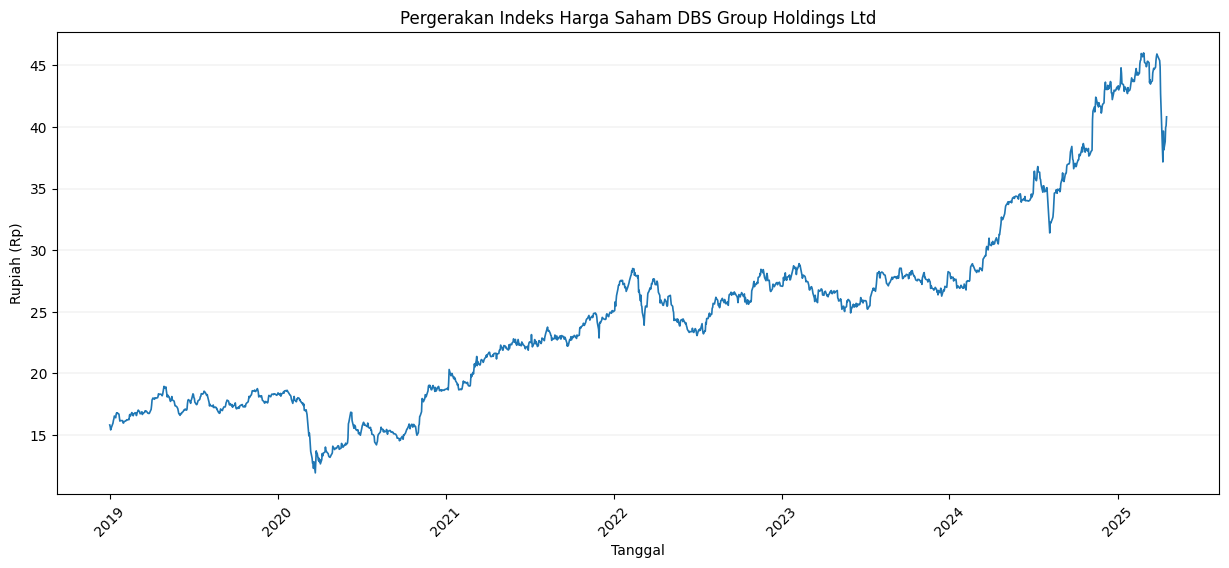

In [ ]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Indeks Harga Saham DBS Group Holdings Ltd')
plt.plot(data['Date'], data['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [10]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.11411045],
       [0.11020523],
       [0.1023949 ],
       ...,
       [0.82234856],
       [0.82645047],
       [0.84783917]])

In [ ]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [ ]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [11]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [12]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1582
Jumlah data training: 1265
Jumlah data validasi: 159
Jumlah data testing:158


In [13]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [14]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [16]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [17]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [18]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

In [19]:
# Membangun model Bi-LSTM
import tensorflow as tf
from keras.layers import LSTM, Dropout, Dense, Input

model = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [20]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_lstm_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [21]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=op, loss='mean_squared_error')

In [22]:
# Melakukan training pada model Bi-LSTM
history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0181
Epoch 1: val_loss improved from inf to 0.00807, saving model to model_checkpoints/weights_lstm_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0180 - val_loss: 0.0081
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012
Epoch 2: val_loss improved from 0.00807 to 0.00107, saving model to model_checkpoints/weights_lstm_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/100
152/155 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8117e-04
Epoch 3: val_loss did not improve from 0.00107
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9.8231e-04 - val_loss: 0.0017
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010
Epoch 4: val_loss improved from 0.00107 to 0.00097, saving model to model_checkpoints/weights_lstm_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0010 - val_loss: 9.7310e-04
Epoch 5/100
151/15

Model menunjukkan penurunan signifikan pada training loss dan validation loss di awal epoch, terutama pada epoch ke-2 di mana val_loss mencapai titik terendah yaitu 0.00107, menandakan performa prediksi yang sangat baik. Namun, setelah itu, val_loss justru meningkat lagi, menunjukkan adanya overfitting—model terlalu menyesuaikan diri dengan data latih. Karena itu, early stopping aktif di epoch ke-7, dan model menggunakan bobot terbaik dari epoch ke-2.

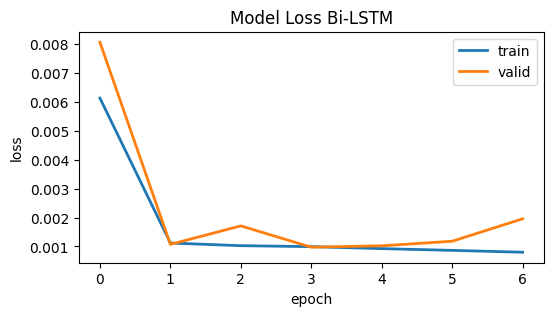

In [23]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-LSTM')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

Grafik menunjukkan loss untuk data training dan validasi turun tajam di awal (epoch 0–1), lalu mulai fluktuatif kecil. Validation loss terendah tercapai di epoch ke-1, setelah itu sedikit meningkat, mengindikasikan awal terjadinya overfitting.

In [24]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [25]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [26]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [27]:
# Load bobot model lstm terbaik
model.load_weights("/content/model_checkpoints/weights_lstm_model.weights.h5")

In [28]:
# Melakukan prediksi
y_pred = model.predict(x_test)
y_pred = np.ceil(sc.inverse_transform(y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [29]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(np.mean(y_test - y_pred)**2), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

print("\n📊 Evaluasi Bi-LSTM Model:")
# print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
# print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')


📊 Evaluasi Bi-LSTM Model:
RMSE : 0.37
MAPE : 2.69 %


Model Bi-LSTM menghasilkan RMSE sebesar 0.37 dan MAPE sebesar 2.69%, menunjukkan bahwa model memiliki kesalahan prediksi yang kecil dan akurasi yang cukup tinggi dalam memprediksi harga saham DBS. Ini membuktikan bahwa model cukup andal untuk memprediksi tren pasar dengan tingkat error yang rendah.

In [30]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Close,Prediction
1424,2024-09-02,35.831989,35.0
1425,2024-09-03,36.270153,35.0
1426,2024-09-04,35.637249,35.0
1427,2024-09-05,35.685936,35.0
1428,2024-09-06,35.569088,35.0
...,...,...,...
1577,2025-04-11,38.130001,44.0
1578,2025-04-14,38.810001,44.0
1579,2025-04-15,39.959999,43.0
1580,2025-04-16,40.099998,43.0


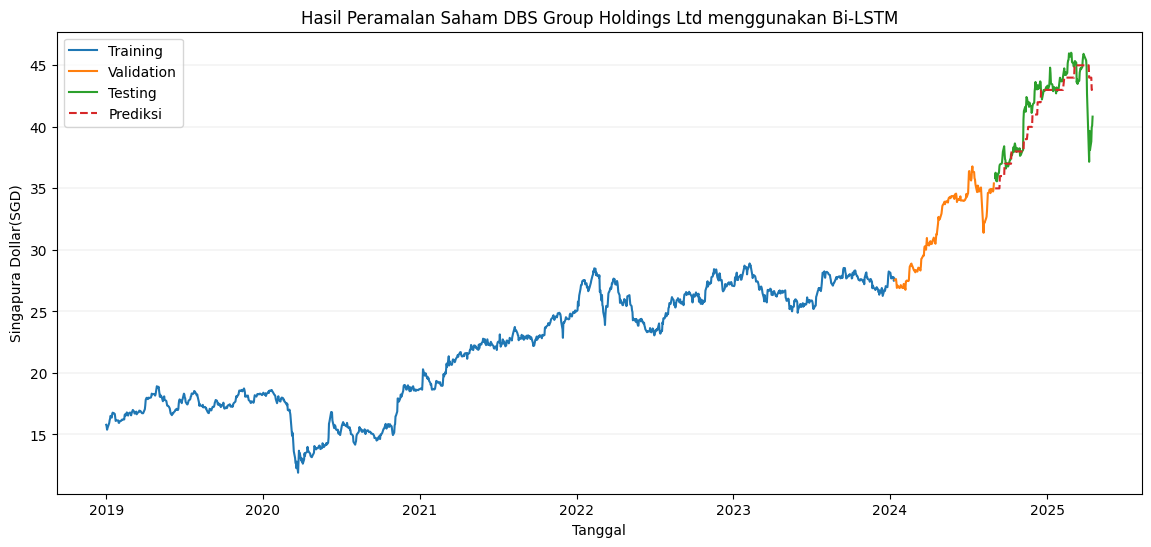

In [31]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham DBS Group Holdings Ltd menggunakan Bi-LSTM')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Singapura Dollar(SGD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Model Bi-LSTM mampu mengikuti tren harga saham DBS dengan baik, terutama pada data validation dan testing. Garis prediksi (merah putus-putus) cukup dekat dengan data aktual (garis hijau), meskipun ada sedikit deviasi pada fluktuasi tajam. Ini menunjukkan bahwa model efektif menangkap pola umum, tapi sedikit kurang presisi saat perubahan harga ekstrem.

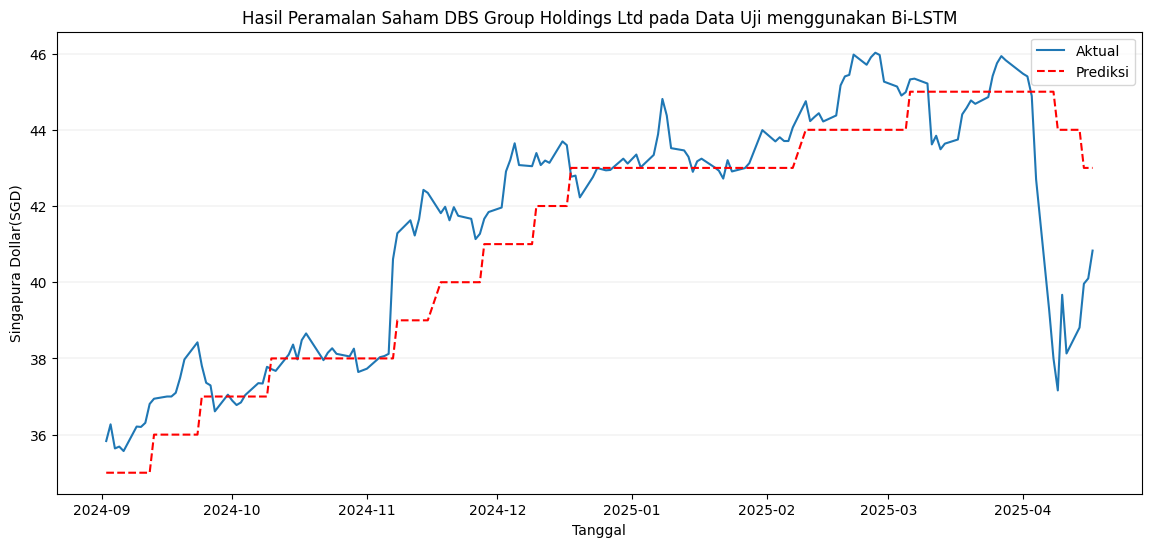

In [32]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham DBS Group Holdings Ltd pada Data Uji menggunakan Bi-LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Singapura Dollar(SGD)')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Model Bi-LSTM berhasil menangkap arah tren umum (naik atau turun) dengan cukup baik, tetapi prediksi terlihat lebih "kaku" dan kurang responsif terhadap perubahan harga yang cepat dan tajam, terutama saat terjadi lonjakan dan penurunan drastis.

In [33]:
# ========== Prediksi 30 Hari ke Depan ==========
import pandas as pd
from datetime import timedelta

# Ambil 30 hari terakhir sebagai input awal
last_30 = data_sc[-30:]
input_pred = last_30.reshape(1, 30, 1)

future_preds = []

for _ in range(30):
    next_pred = model.predict(input_pred)[0][0]
    future_preds.append(next_pred)

    # Update window input
    next_input = np.append(input_pred[0, 1:, 0], next_pred)
    input_pred = next_input.reshape(1, 30, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [34]:
# Invers skala
future_preds_inv = sc.inverse_transform(np.array(future_preds).reshape(-1, 1))
future_preds_inv = np.ceil(future_preds_inv)

In [35]:
# Buat tanggal prediksi hanya weekday
last_date = pd.to_datetime(data['Date'].iloc[-1])
future_dates = []
curr_date = last_date + timedelta(days=1)

while len(future_dates) < 30:
    if curr_date.weekday() < 5:
        future_dates.append(curr_date)
    curr_date += timedelta(days=1)

# DataFrame hasil prediksi
pred_30_df = pd.DataFrame({
    'Date': future_dates,
    'Prediction': future_preds_inv.flatten()
})

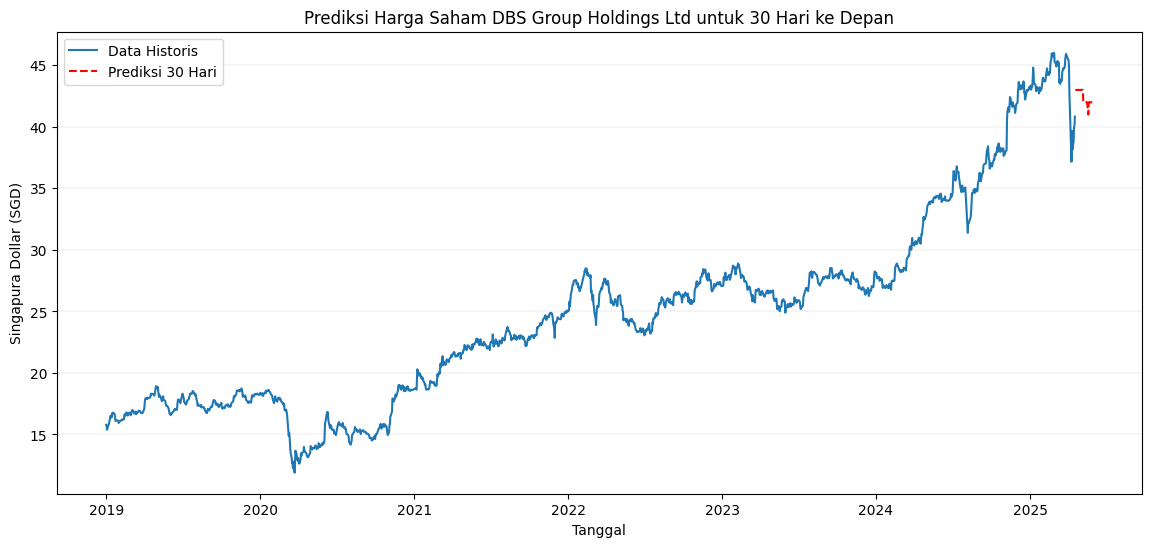

In [36]:
# Visualisasi hasil prediksi 30 hari ke depan
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham DBS Group Holdings Ltd untuk 30 Hari ke Depan')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_df['Date'], pred_30_df['Prediction'], label='Prediksi 30 Hari', linestyle='--', color='red')
plt.xlabel('Tanggal')
plt.ylabel('Singapura Dollar (SGD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Model Bi-LSTM memprediksi bahwa harga saham DBS Group Holdings Ltd akan cenderung sedikit beerubah-ubah dengan arah pergerakan stabil di kisaran harga saat ini. Pola prediksi menunjukkan ketidakpastian kecil namun masih dalam tren harga yang relatif terjaga.

In [37]:
# Membangun model Bi-GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(GRU(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [38]:
# Path GRU model checkpoint
checkpoint_path_gru = 'model_checkpoints/weights_gru_model.weights.h5'
checkpoint_gru = ModelCheckpoint(
    filepath=checkpoint_path_gru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [39]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [40]:
# Compile model Bi-GRU (pastikan variabel `op` terdefinisi, atau ganti langsung dengan 'adam')
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
# Training model Bi-GRU
history_gru = model_gru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_gru, early_stopping]
)

Epoch 1/100
153/155 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0084
Epoch 1: val_loss improved from inf to 0.00050, saving model to model_checkpoints/weights_gru_model.weights.h5
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0083 - val_loss: 4.9864e-04
Epoch 2/100
154/155 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.1761e-04
Epoch 2: val_loss did not improve from 0.00050
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 6.1651e-04 - val_loss: 0.0018
Epoch 3/100
152/155 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0977e-04
Epoch 3: val_loss did not improve from 0.00050
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.0927e-04 - val_loss: 5.4054e-04
Epoch 4/100
152/155 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.8657e-04
Epoch 4: val_loss did not improve from 0.00050
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 5.8640e-04 - val_loss: 0.0029
Epoch 5/100
150/155 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.8361e-04
Epoch 5: val_loss improved from 0.00050 to 0.00028, saving mode

Model GRU yang dilatih menunjukkan performa yang cukup baik dengan penurunan signifikan pada nilai loss dan val_loss selama beberapa epoch awal. Nilai val_loss terbaik tercapai pada epoch ke-8 sebesar 0.00019, menandakan bahwa model mampu melakukan generalisasi dengan cukup baik terhadap data validasi pada titik tersebut. Meskipun terdapat fluktuasi pada val_loss di beberapa epoch berikutnya, penggunaan early stopping berhasil mencegah overfitting lebih lanjut dengan mengembalikan bobot model ke kondisi terbaiknya. Secara keseluruhan, proses pelatihan berjalan efektif, namun fluktuasi pada nilai validasi mengindikasikan kemungkinan perlu dilakukan tuning lebih lanjut terhadap arsitektur atau parameter pelatihan.

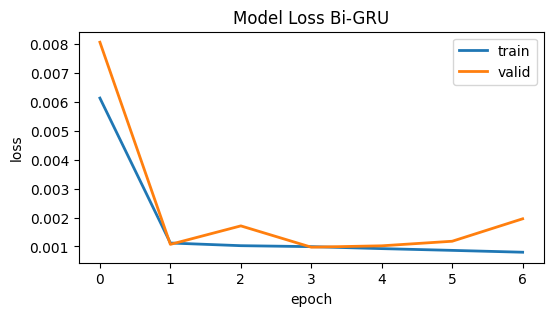

In [42]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

Grafik tersebut menunjukkan performa model Bi-GRU dalam memprediksi saham DBS berdasarkan nilai loss selama proses pelatihan dan validasi. Terlihat bahwa loss menurun drastis pada awal epoch, mengindikasikan bahwa model dengan cepat belajar dari data. Setelah epoch pertama, nilai loss validasi mengalami sedikit fluktuasi, namun tetap berada pada kisaran yang rendah dan stabil. Perbedaan antara loss pelatihan dan validasi relatif kecil, yang menandakan bahwa model tidak mengalami overfitting secara signifikan dan memiliki kemampuan generalisasi yang baik. Secara keseluruhan, nilai loss yang sangat rendah menunjukkan bahwa model Bi-GRU berhasil mempelajari pola dalam data dengan cukup akurat.

In [43]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [44]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [45]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [46]:
# Load bobot model GRU terbaik
model_gru.load_weights("/content/model_checkpoints/weights_gru_model.weights.h5")

In [47]:
# Melakukan prediksi
y_pred_gru = model_gru.predict(x_test)
y_pred_gru = np.ceil(sc.inverse_transform(y_pred_gru))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


In [48]:
# Evaluasi Bi-GRU
mse_gru = round(mean_squared_error(y_test, y_pred_gru), 2)
rmse_gru = round(np.sqrt(np.mean(y_test - y_pred_gru)**2), 2)
mae_gru = round(mean_absolute_error(y_test, y_pred_gru), 2)
mape_gru = round(mean_absolute_percentage_error(y_test, y_pred_gru)*100, 2)

print("\n📊 Evaluasi Bi-GRU Model:")
print(f'RMSE : {rmse_gru}')
print(f'MAPE : {mape_gru} %')


📊 Evaluasi Bi-GRU Model:
RMSE : 0.08
MAPE : 1.2 %


Berdasarkan hasil evaluasi model Bi-GRU, diperoleh nilai RMSE sebesar 0.08 dan MAPE sebesar 1.2%. Nilai RMSE yang rendah menunjukkan bahwa rata-rata kesalahan prediksi model terhadap nilai aktual cukup kecil. Selain itu, MAPE yang hanya sebesar 1.2% mengindikasikan bahwa secara persentase, prediksi model sangat mendekati nilai sebenarnya. Hal ini memperkuat temuan dari grafik loss sebelumnya, bahwa model Bi-GRU mampu mempelajari pola data saham DBS dengan baik dan memberikan performa prediksi yang akurat serta stabil.

In [49]:
# dataframe hasil prediksi GRU
data_pred_gru = data[-test_len:].copy()
data_pred_gru['Prediction_GRU'] = y_pred_gru

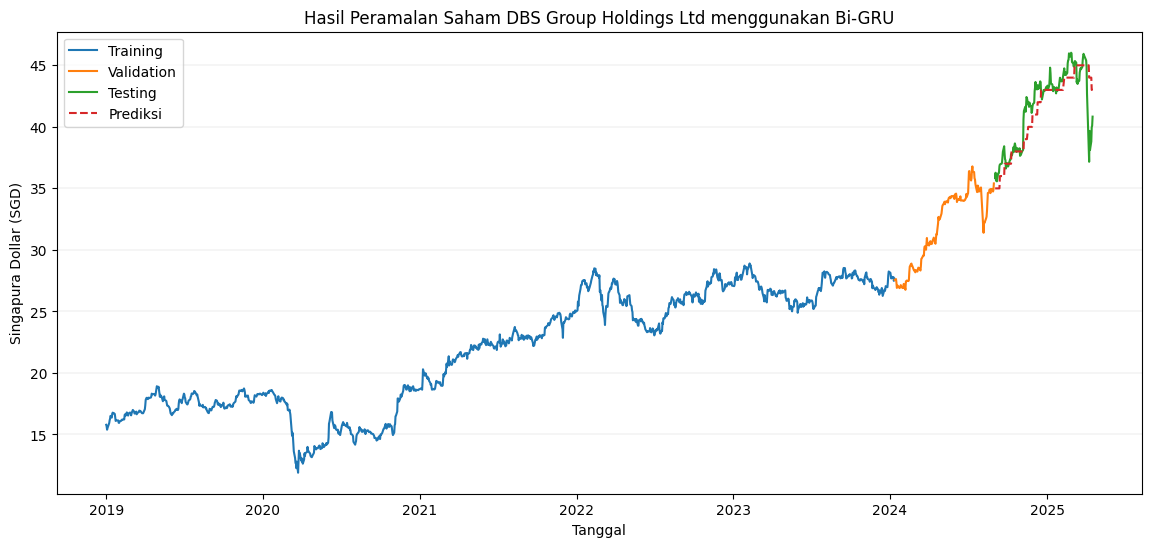

In [50]:
# Visualisasi Hasil Prediksi GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham DBS Group Holdings Ltd menggunakan Bi-GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Singapura Dollar (SGD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

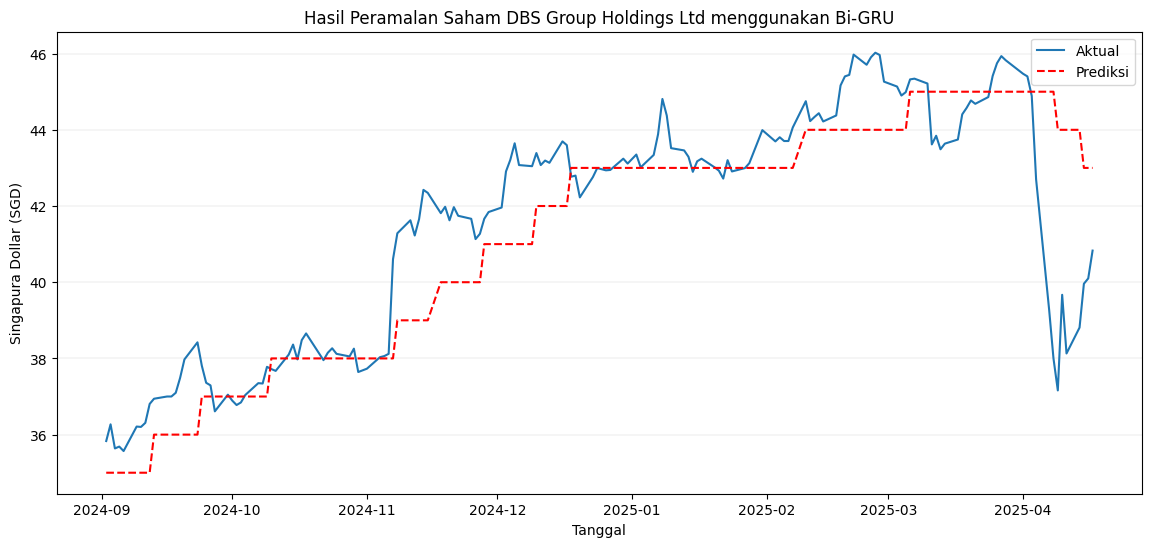

In [51]:
# Visualisasi Prediksi GRU
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham DBS Group Holdings Ltd menggunakan Bi-GRU')
plt.xlabel('Tanggal')
plt.ylabel('Singapura Dollar (SGD)')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik diatas menunjukkan hasil peramalan harga saham DBS Group Holdings Ltd menggunakan model Bi-GRU. Garis biru menggambarkan pergerakan harga saham aktual, sedangkan garis merah putus-putus menunjukkan hasil prediksi model. Secara umum, model mampu mengikuti tren naik dari harga saham dengan cukup baik, terutama pada periode stabil hingga awal tahun 2025. Namun, terlihat bahwa model cenderung memberikan prediksi yang lebih halus dan kurang responsif terhadap perubahan harga yang tajam, seperti penurunan drastis pada bulan Maret–April 2025. Hal ini menunjukkan bahwa model lebih kuat dalam memprediksi tren jangka menengah, namun kurang akurat dalam menangkap volatilitas atau lonjakan harga yang ekstrem.

In [52]:
# Ambil 30 hari terakhir sebagai input awal
last_30_gru = data_sc[-30:]
input_pred_gru = last_30_gru.reshape(1, 30, 1)

future_preds_gru = []

for _ in range(30):
    next_pred_gru = model_gru.predict(input_pred_gru, verbose=0)[0][0]
    future_preds_gru.append(next_pred_gru)

    # Perbarui jendela input
    next_input_gru = np.append(input_pred_gru[0, 1:, 0], next_pred_gru)
    input_pred_gru = next_input_gru.reshape(1, 30, 1)

In [53]:
# Invers transformasi skala
future_preds_inv_gru = sc.inverse_transform(np.array(future_preds_gru).reshape(-1, 1))
future_preds_inv_gru = np.ceil(future_preds_inv_gru)

In [54]:
# Buat tanggal prediksi (hanya hari kerja)
last_date_gru = pd.to_datetime(data['Date'].iloc[-1])
future_dates_gru = []
curr_date_gru = last_date_gru + timedelta(days=1)

while len(future_dates_gru) < 30:
    if curr_date_gru.weekday() < 5:  # Hanya hari kerja
        future_dates_gru.append(curr_date_gru)
    curr_date_gru += timedelta(days=1)

In [55]:
# Buat DataFrame hasil prediksi GRU
pred_30_gru_df = pd.DataFrame({
    'Date': future_dates_gru,
    'Prediction_GRU': future_preds_inv_gru.flatten()
})

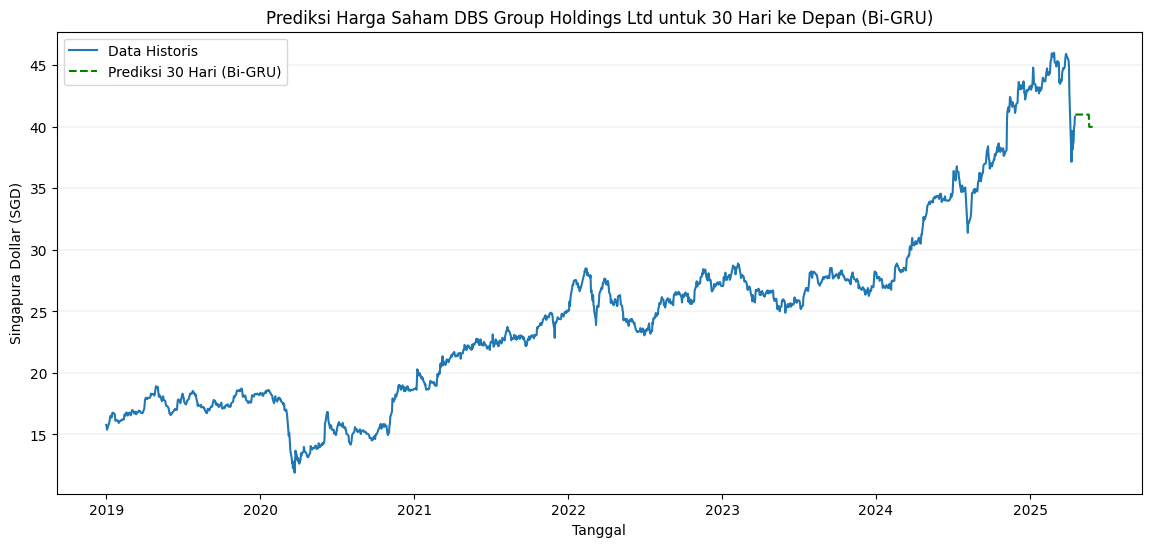

In [56]:
# Visualisasi hasil prediksi 30 hari ke depan dengan Bi-GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham DBS Group Holdings Ltd untuk 30 Hari ke Depan (Bi-GRU)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_gru_df['Date'], pred_30_gru_df['Prediction_GRU'], label='Prediksi 30 Hari (Bi-GRU)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('Singapura Dollar (SGD)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

Grafik ini menunjukkan hasil prediksi harga saham DBS Group Holdings Ltd selama 30 hari ke depan menggunakan model Bi-GRU. Garis biru menggambarkan data historis sejak tahun 2018, sementara garis hijau putus-putus di bagian akhir grafik merupakan hasil proyeksi model. Secara visual, prediksi tampak cukup stabil dan tidak menunjukkan fluktuasi tajam, yang mengindikasikan model memperkirakan pergerakan harga akan cenderung stagnan dalam jangka pendek. Meskipun model mengikuti tren sebelumnya secara umum, tampak bahwa model masih cenderung konservatif dan kurang menangkap potensi lonjakan atau penurunan harga yang tajam. Hal ini menunjukkan bahwa model lebih cocok digunakan untuk estimasi jangka pendek dengan asumsi pasar yang relatif stabil.